In [1]:
import pandas as pd

from take_homes.ultimate_data.ultimate_utils import read_ultimate_data, add_retained_label,perform_data_transforms
from take_homes.ultimate_data.ultimate_utils import encode_ultimate_features
from take_homes.ultimate_data.ultimate_utils import plot_heatmap
from take_homes.ultimate_data.ultimate_utils import correlate_to_target, plot_correlations
from take_homes.ultimate_data.ultimate_utils import calc_feature_importance
from take_homes.ultimate_data.ultimate_utils import plot_accuracy
from take_homes.ultimate_data.ultimate_utils import print_f1_scores
from take_homes.ultimate_data.ultimate_utils import plot_confusion_matrix
from take_homes.ultimate_data.ultimate_utils import plot_roc_curve
from sklearn.metrics import roc_auc_score

import numpy as np

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
features_df = pd.read_parquet("data/ultimate_features.parquet")
target_df = pd.read_parquet("data/ultimate_target.parquet")

In [3]:
features_df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,last_trip_days_since_su,phone_android,phone_iphone,phone_other,city_astapor,city_king's_landing,city_winterfell,signup_month_1
0,0.453984,0.174240,0.113506,0.328202,1,-0.397131,-0.372650,0.497684,0.808153,0,1,0,0,1,0,1
1,-0.600689,0.705241,-0.336268,-0.443394,0,-0.294653,0.431583,0.497684,0.051665,1,0,0,1,0,0,1
2,0.190316,-0.533761,-0.336268,-0.443394,0,1.053741,-0.880771,0.497684,-1.477407,0,1,0,1,0,0,1
3,1.772325,-0.002760,0.293416,0.558679,1,0.514383,-0.602181,0.273342,1.242731,0,1,0,0,1,0,1
4,3.090665,-0.356760,0.518303,0.147829,0,0.579106,-0.467266,0.273342,-0.737014,1,0,0,0,0,1,1


In [4]:
target_df.head()

,retained
0,1
1,0
2,0
3,1
4,0


In [5]:
from sklearn.model_selection import train_test_split
from utimale_model import create_team_week_model, train_team_week_model

X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, shuffle=True, test_size=0.33, random_state=42)


model = create_team_week_model(
    features_df.shape[1],
    regularization_rate=.001,
    activation_function="relu",
    output_function="sigmoid")

r = train_team_week_model(model=model, X=X_train, y=y_train,
                          epochs_size=25,
                          batch_size=32,
                          verbose=4,
                          learning_rate=.001,
                          validation_split=0.25,
                          # validation_data=(X_test, y_test),
                          loss_function='binary_crossentropy')


2023-09-14 21:15:34.080228: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-09-14 21:15:34.080252: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-09-14 21:15:34.080256: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-09-14 21:15:34.080291: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-14 21:15:34.080307: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/100


2023-09-14 21:15:34.518260: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-14 21:15:39.276789: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100


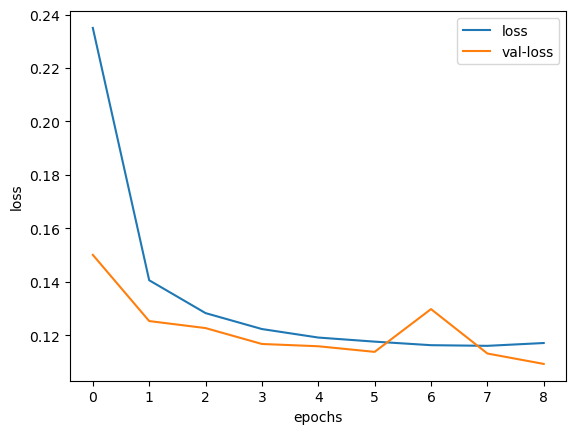

In [6]:
from take_homes.ultimate_data.ultimate_utils import plot_loss

plot_loss(r)

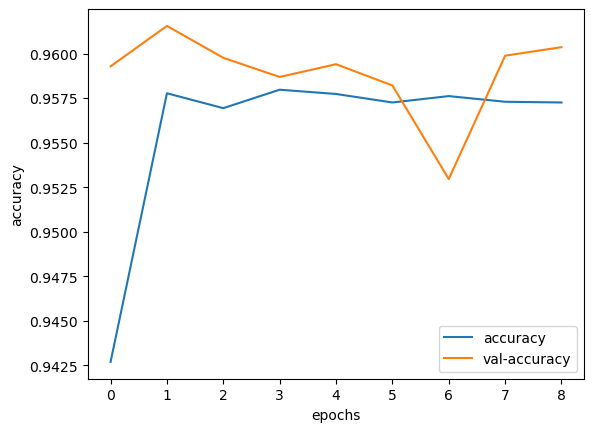

In [7]:

plot_accuracy(r)

In [8]:
threshold = 0.5
y_pred_probs = model.predict(X_test)
y_pred_binary = (y_pred_probs >= threshold).astype(int)
count = np.sum(y_pred_probs > 0.5)
print('Count of positive predictions: ', count)

# game_test['y_pred_binary'] = y_pred_binary

 88/516 [====>.........................] - ETA: 0s

2023-09-14 21:16:22.923809: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


516/516 [==============================] - 1s 2ms/step
Count of positive predictions:  6127


In [9]:
print_f1_scores(y_pred_binary, y_test)


Precision: 0.9415700995593276
Recall: 0.9560822008617832
F1-score: 0.9487706603075404


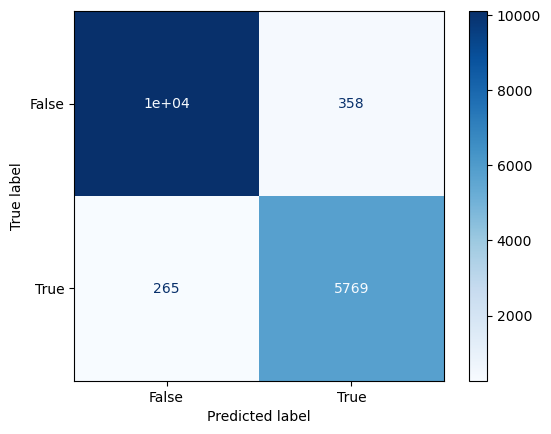

In [10]:
plot_confusion_matrix(y_pred_binary, y_test)

AUC:     0.9609381002397966


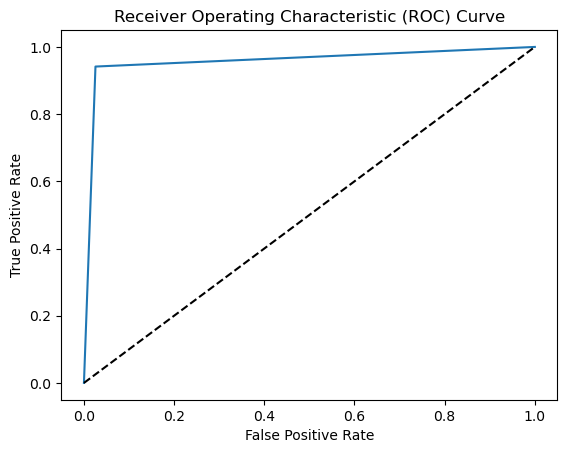

In [11]:
# Assuming you have y_actual and y_predicted for binary classification
auc = roc_auc_score(y_test, y_pred_binary)
print("AUC:    ", auc)
plot_roc_curve(y_pred_binary, y_test)